In [1]:
import addons
import numpy as np
import pandas as pd 
import os
import helpers
import random
import math
import matplotlib.pyplot as plt 
from matplotlib.patches import Polygon
from matplotlib.widgets import Slider
from matplotlib.animation import FuncAnimation

/home/hyc_1/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "



              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.7.0
 Built: Apr 15 2024 07:21:32

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
list_dirs = os.listdir("data_background_rate_jesus/")
list_dirs = sorted(list_dirs)
list_dirs.remove('23.08')
num_pops = 8
pop_activities = np.zeros((len(list_dirs),num_pops,1000))
bg_rate = [0.0,0.25,0.51,0.76,1.01,1.27,1.52,1.77,2.03,2.28,2.53,2.79,3.04,3.29,3.55,3.8,4.05,4.31,4.56,4.81,5.07,5.32,5.57,5.83,6.08,6.33,6.59,6.84,7.09,7.35,7.6,7.85,8.11,8.36,8.61,8.87,9.12,9.37,9.63,9.88,10.13,10.38,10.64,10.89,11.14,11.4,11.65,11.9,12.16,12.41,12.66,12.92,13.17,13.42,13.68,13.93,14.18,14.44,14.69,14.94,15.2,15.45,15.7,15.96,16.21,16.46,16.72,16.97,17.22,17.48,17.73,17.98,18.24,18.49,18.74,19.0,19.25,19.5,19.76,20.01,20.26,20.52,20.77,21.02,21.28,21.53,21.78,22.04,22.29,22.54,22.8]

name = "data_background_rate_jesus/" + list_dirs[0] + '/trial_0/measurements/pop_activities/'
test = np.loadtxt(name+'pop_activity_0.dat')
pop_activities = np.zeros((len(list_dirs),num_pops,len(test)))
times = np.zeros((len(list_dirs),num_pops,len(test)))

for i in range(len(list_dirs)):
    name =  "data_background_rate_jesus/" + list_dirs[i] + '/trial_0/measurements/pop_activities/'
    name_times = "data_background_rate_jesus/" + list_dirs[i] + '/trial_0/measurements/times/'
    for j in range(num_pops):
        pop_activities[i][j][:] = np.loadtxt(name+'pop_activity_' + str(j) + '.dat')
        times[i][j][:] = np.loadtxt(name_times+'times_' + str(j) + '.dat',skiprows=1)

In [3]:
def prepare_data(data_pop):
    data_voltages = { }

    names = ["L23E", "L23I", "L4E", "L4I", "L5E", "L5I", "L6E", "L6I"]



    for i in range(len(data_pop)):
        random.shuffle(data_pop[i])
        data_voltages[names[i]] =  np.mean(data_pop[i][0:1000],axis=0)


    return data_voltages

In [4]:
list_dirs = os.listdir("data_background_rate_jesus/")
list_dirs = sorted(list_dirs)
list_dirs.remove('23.08')
num_pops = 8
pop_activities = np.zeros((len(list_dirs),num_pops,1000))
bg_rate = [0.0,0.25,0.51,0.76,1.01,1.27,1.52,1.77,2.03,2.28,2.53,2.79,3.04,3.29,3.55,3.8,4.05,4.31,4.56,4.81,5.07,5.32,5.57,5.83,6.08,6.33,6.59,6.84,7.09,7.35,7.6,7.85,8.11,8.36,8.61,8.87,9.12,9.37,9.63,9.88,10.13,10.38,10.64,10.89,11.14,11.4,11.65,11.9,12.16,12.41,12.66,12.92,13.17,13.42,13.68,13.93,14.18,14.44,14.69,14.94,15.2,15.45,15.7,15.96,16.21,16.46,16.72,16.97,17.22,17.48,17.73,17.98,18.24,18.49,18.74,19.0,19.25,19.5,19.76,20.01,20.26,20.52,20.77,21.02,21.28,21.53,21.78,22.04,22.29,22.54,22.8]
num_neurons = [20683,5834,21915,5479,4850,1065,14395,2948]
name = "data_background_rate_jesus/" + list_dirs[0] + '/trial_0/measurements/pop_activities/'
test = np.loadtxt(name+'pop_activity_0.dat')
data_voltages = {}

for i in range(len(list_dirs[0:15])):
    voltage_data = addons.load_data("data_background_rate_jesus/" + list_dirs[i] + '/trial_0/','voltmeter')
    data_pop = {}
    names = ["L23E","L23I","L4E","L4I","L5E","L5I","L6E","L6I"]
    for j in range(len(num_neurons)):
        data_pop[j] = addons.split_data(voltage_data[j],num_neurons[j])
    del(voltage_data)
    data_voltages[i] = prepare_data(data_pop)

In [ ]:
list_dirs = os.listdir("data_background_rate_jesus/")
list_dirs = sorted(list_dirs)
list_dirs.remove('23.08')
num_pops = 8
pop_activities = np.zeros((len(list_dirs),num_pops,1000))
bg_rate = [0.0,0.25,0.51,0.76,1.01,1.27,1.52,1.77,2.03,2.28,2.53,2.79,3.04,3.29,3.55,3.8,4.05,4.31,4.56,4.81,5.07,5.32,5.57,5.83,6.08,6.33,6.59,6.84,7.09,7.35,7.6,7.85,8.11,8.36,8.61,8.87,9.12,9.37,9.63,9.88,10.13,10.38,10.64,10.89,11.14,11.4,11.65,11.9,12.16,12.41,12.66,12.92,13.17,13.42,13.68,13.93,14.18,14.44,14.69,14.94,15.2,15.45,15.7,15.96,16.21,16.46,16.72,16.97,17.22,17.48,17.73,17.98,18.24,18.49,18.74,19.0,19.25,19.5,19.76,20.01,20.26,20.52,20.77,21.02,21.28,21.53,21.78,22.04,22.29,22.54,22.8]
num_neurons = [20683,5834,21915,5479,4850,1065,14395,2948]
name = "data_background_rate_jesus/" + list_dirs[0] + '/trial_0/measurements/pop_activities/'
test = np.loadtxt(name+'pop_activity_0.dat')
data_voltages_2 = {}

for i in range(len(list_dirs[15:30])):
    voltage_data = addons.load_data("data_background_rate_jesus/" + list_dirs[i+15] + '/trial_0/','voltmeter')
    data_pop = {}
    names = ["L23E","L23I","L4E","L4I","L5E","L5I","L6E","L6I"]
    for j in range(len(num_neurons)):
        data_pop[j] = addons.split_data(voltage_data[j],num_neurons[j])
    del(voltage_data)
    data_voltages_2[i] = prepare_data(data_pop)

In [ ]:
list_dirs = os.listdir("data_background_rate_jesus/")
list_dirs = sorted(list_dirs)
list_dirs.remove('23.08')
num_pops = 8
pop_activities = np.zeros((len(list_dirs),num_pops,1000))
bg_rate = [0.0,0.25,0.51,0.76,1.01,1.27,1.52,1.77,2.03,2.28,2.53,2.79,3.04,3.29,3.55,3.8,4.05,4.31,4.56,4.81,5.07,5.32,5.57,5.83,6.08,6.33,6.59,6.84,7.09,7.35,7.6,7.85,8.11,8.36,8.61,8.87,9.12,9.37,9.63,9.88,10.13,10.38,10.64,10.89,11.14,11.4,11.65,11.9,12.16,12.41,12.66,12.92,13.17,13.42,13.68,13.93,14.18,14.44,14.69,14.94,15.2,15.45,15.7,15.96,16.21,16.46,16.72,16.97,17.22,17.48,17.73,17.98,18.24,18.49,18.74,19.0,19.25,19.5,19.76,20.01,20.26,20.52,20.77,21.02,21.28,21.53,21.78,22.04,22.29,22.54,22.8]
num_neurons = [20683,5834,21915,5479,4850,1065,14395,2948]
name = "data_background_rate_jesus/" + list_dirs[0] + '/trial_0/measurements/pop_activities/'
test = np.loadtxt(name+'pop_activity_0.dat')
data_voltages_3 = {}

for i in range(len(list_dirs[30:45])):
    voltage_data = addons.load_data("data_background_rate_jesus/" + list_dirs[i+30] + '/trial_0/','voltmeter')
    data_pop = {}
    names = ["L23E","L23I","L4E","L4I","L5E","L5I","L6E","L6I"]
    for j in range(len(num_neurons)):
        data_pop[j] = addons.split_data(voltage_data[j],num_neurons[j])
    del(voltage_data)
    data_voltages_3[i] = prepare_data(data_pop)

In [ ]:
list_dirs = os.listdir("data_background_rate_jesus/")
list_dirs = sorted(list_dirs)
list_dirs.remove('23.08')
num_pops = 8
pop_activities = np.zeros((len(list_dirs),num_pops,1000))
bg_rate = [0.0,0.25,0.51,0.76,1.01,1.27,1.52,1.77,2.03,2.28,2.53,2.79,3.04,3.29,3.55,3.8,4.05,4.31,4.56,4.81,5.07,5.32,5.57,5.83,6.08,6.33,6.59,6.84,7.09,7.35,7.6,7.85,8.11,8.36,8.61,8.87,9.12,9.37,9.63,9.88,10.13,10.38,10.64,10.89,11.14,11.4,11.65,11.9,12.16,12.41,12.66,12.92,13.17,13.42,13.68,13.93,14.18,14.44,14.69,14.94,15.2,15.45,15.7,15.96,16.21,16.46,16.72,16.97,17.22,17.48,17.73,17.98,18.24,18.49,18.74,19.0,19.25,19.5,19.76,20.01,20.26,20.52,20.77,21.02,21.28,21.53,21.78,22.04,22.29,22.54,22.8]
num_neurons = [20683,5834,21915,5479,4850,1065,14395,2948]
name = "data_background_rate_jesus/" + list_dirs[0] + '/trial_0/measurements/pop_activities/'
test = np.loadtxt(name+'pop_activity_0.dat')
data_voltages_4 = {}

for i in range(len(list_dirs[45:60])):
    voltage_data = addons.load_data("data_background_rate_jesus/" + list_dirs[i+45] + '/trial_0/','voltmeter')
    data_pop = {}
    names = ["L23E","L23I","L4E","L4I","L5E","L5I","L6E","L6I"]
    for j in range(len(num_neurons)):
        data_pop[j] = addons.split_data(voltage_data[j],num_neurons[j])
    del(voltage_data)
    data_voltages_4[i] = prepare_data(data_pop)

In [ ]:
voltage_difference = np.zeros((len(list_dirs[0:15]),num_pops))
voltage_max = np.zeros((len(list_dirs[0:15]),num_pops))
voltage_min = np.zeros((len(list_dirs[0:15]),num_pops))

for i in range(len(list_dirs[0:15])):
    for j in range(num_pops):
        voltage_difference[i][j] = max(data_voltages[i][names[j]][:]) - min(data_voltages[i][names[j]][:])
        voltage_max[i][j] = max(data_voltages[i][names[j]][:])
        voltage_min[i][j] = min(data_voltages[i][names[j]][:])

In [ ]:
voltage_difference2 = np.zeros((len(list_dirs[15:30]),num_pops))
voltage_max2 = np.zeros((len(list_dirs[15:30]),num_pops))
voltage_min2 = np.zeros((len(list_dirs[15:30]),num_pops))

for i in range(len(list_dirs[15:30])):
    for j in range(num_pops):
        voltage_difference2[i][j] = max(data_voltages_2[i][names[j]][:]) - min(data_voltages_2[i][names[j]][:])
        voltage_max2[i][j] = max(data_voltages_2[i][names[j]][:])
        voltage_min2[i][j] = min(data_voltages_2[i][names[j]][:])

In [ ]:
voltage_difference3 = np.zeros((len(list_dirs[15:30]),num_pops))
voltage_max3 = np.zeros((len(list_dirs[15:30]),num_pops))
voltage_min3 = np.zeros((len(list_dirs[15:30]),num_pops))

for i in range(len(list_dirs[15:30])):
    for j in range(num_pops):
        voltage_difference3[i][j] = max(data_voltages_3[i][names[j]][:]) - min(data_voltages_3[i][names[j]][:])
        voltage_max3[i][j] = max(data_voltages_3[i][names[j]][:])
        voltage_min3[i][j] = min(data_voltages_3[i][names[j]][:])

In [ ]:
voltage_difference4 = np.zeros((len(list_dirs[15:30]),num_pops))
voltage_max4 = np.zeros((len(list_dirs[15:30]),num_pops))
voltage_min4 = np.zeros((len(list_dirs[15:30]),num_pops))

for i in range(len(list_dirs[15:30])):
    for j in range(num_pops):
        voltage_difference4[i][j] = max(data_voltages_4[i][names[j]][:]) - min(data_voltages_4[i][names[j]][:])
        voltage_max4[i][j] = max(data_voltages_4[i][names[j]][:])
        voltage_min4[i][j] = min(data_voltages_4[i][names[j]][:])

In [ ]:
voltage_difference = np.zeros((len(list_dirs),num_pops))
voltage_max = np.zeros((len(list_dirs),num_pops))
voltage_min = np.zeros((len(list_dirs),num_pops))

for i in range(len(list_dirs)):
    for j in range(num_pops):
        voltage_difference[i][j] = max(pop_activities[i][j][:]) - min(pop_activities[i][j][:])
        voltage_max[i][j] = max(pop_activities[i][j][:])
        voltage_min[i][j] = min(pop_activities[i][j][:])

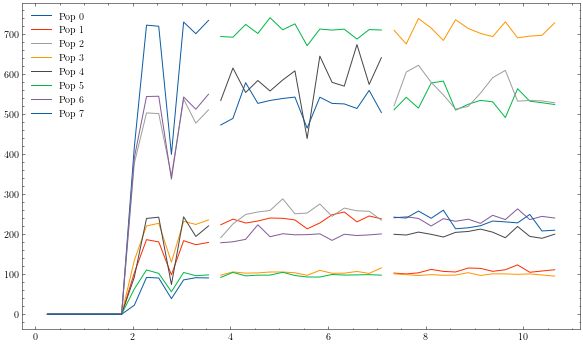

In [14]:
plt.figure(figsize=(10,6))
for i in range(0,num_pops):
    plt.plot(bg_rate[1:15],voltage_difference[1::,i],label = 'Pop ' + str(i))
    plt.plot(bg_rate[15:29],voltage_difference2[1::,i])
    plt.plot(bg_rate[29:43],voltage_difference3[1::,i])
plt.legend()

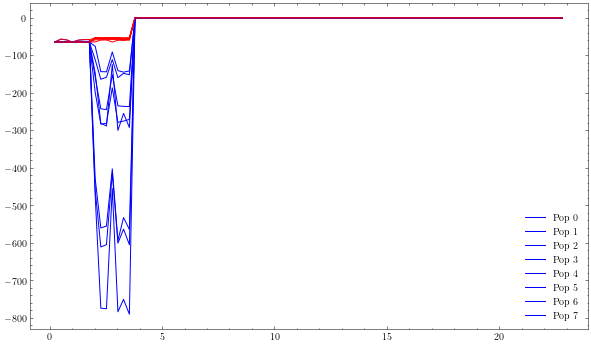

In [10]:
plt.figure(figsize=(10,6))
for i in range(0,num_pops):
    plt.plot(bg_rate[1::],voltage_min[1::,i],label = 'Pop ' + str(i), color = 'blue')
    plt.plot(bg_rate[1::],voltage_max[1::,i], color = 'red')
plt.legend()